In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

Downloader> 

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\Tosin\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
messages[190]

'ham\tI jus reached home. I go bathe first. But my sis using net tell u when she finishes k...'

In [7]:
#collection of text is called a corpus

In [8]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [9]:
import pandas as pd

In [10]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', 
                      names = ['label', 'message'])

In [11]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
sns.set_style('darkgrid')

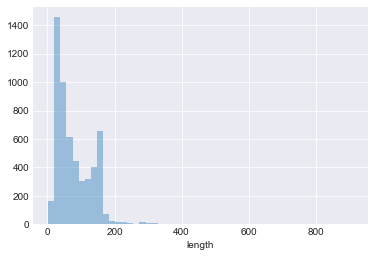

In [18]:
sns.distplot(messages['length'], kde=False, bins=50)

In [19]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [25]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000A9C1286780>,
      dtype=object)

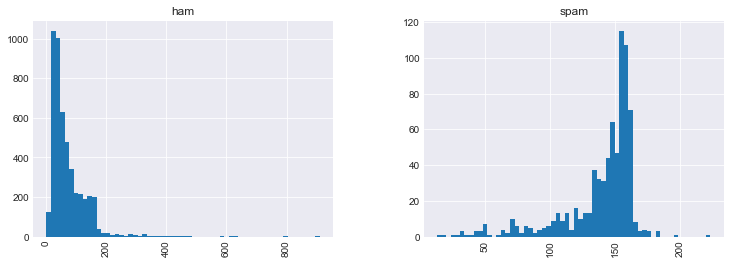

In [26]:
messages.hist(column= 'length', by='label', bins=60, figsize= (12, 4))

In [27]:
#so we can see that length is a good feature for distinguishing between spam and ham  messages

In [28]:
#converting the raw messages, sequence of charaters into vectors

In [29]:
import string

In [30]:
mess = 'Sample message! Botice: it has punctuation.'

In [32]:
nopunc = [c for c in mess if c not in string.punctuation]

In [35]:
from nltk.corpus import stopwords

In [37]:
#stopwords.words('english')

In [38]:
nopunc = ''.join(nopunc)

In [39]:
nopunc

'Sample message Botice it has punctuation'

In [40]:
nopunc.split()

['Sample', 'message', 'Botice', 'it', 'has', 'punctuation']

In [41]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [42]:
clean_mess

['Sample', 'message', 'Botice', 'punctuation']

In [43]:
#the function that does it all
def  text_process(mess):
    """
    1. remove punctuations
    2. remove stop words
    3. return list of clean words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [44]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
#Tokenize the messages, tokenization is the process of converting 
#a normal text string into a list of tokens(wanted words)

In [46]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [47]:
#stemming helps with text that has a bunch of similar words e.g running, ran, run

In [49]:
#convert the messages into a list of vectors that scikitlearn can work with 
#we would do this using the Bag of Words model
#count how many times a word occur in each message (Term Frequency)
#weigh the counts, so that the frequent tokens get lower weight (inverse document frequency)
#Normalize the vectors to unit length to abstract from the original text length

In [50]:
#Using scikitlearn countVectorizer
#sparse matrix for the message, word count is generated using in matrices that has a lot of zero values

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
#bow- bag of words
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [53]:
print(len(bow_transformer.vocabulary_))

11425


In [56]:
mess4 = messages['message'][3]

In [57]:
print(mess4)

U dun say so early hor... U c already then say...


In [58]:
bow4 = bow_transformer.transform([mess4])

In [59]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [60]:
print(bow4.shape)

(1, 11425)


In [62]:
bow_transformer.get_feature_names()[9554]

'say'

In [63]:
messages_bow = bow_transformer.transform(messages['message'])

In [64]:
print('Shape of Sparse MAtrix: ', messages_bow.shape)

Shape of Sparse MAtrix:  (5572, 11425)


In [65]:
#amount of none zero occurences
messages_bow.nnz

50548

In [67]:
sparsity = 100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])
print('sparsity : {}'.format(sparsity))

sparsity : 0.07940295412668218


In [68]:
#term weight and normalization from term frquency and inverse document frquency

In [69]:
from sklearn.feature_extraction.text import TfidfTransformer

In [70]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [71]:
tfidf4 = tfidf_transformer.transform(bow4)

In [72]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [73]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [74]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [75]:
#naive bayes classifier, random forest classifier
from sklearn.naive_bayes import MultinomialNB

In [76]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [78]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [79]:
messages['label'][3]

'ham'

In [80]:
all_pred =  spam_detect_model.predict(messages_tfidf)

In [81]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [82]:
from sklearn.model_selection import train_test_split

In [85]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size= 0.3)

In [86]:
from sklearn.pipeline import Pipeline

In [87]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [88]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000A9C363CD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [89]:
predictions = pipeline.predict(msg_test)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1430
       spam       1.00      0.72      0.84       242

avg / total       0.96      0.96      0.96      1672

